In [1]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pylab as plt
import os
import seaborn as sns

In [2]:
train = pd.read_csv('./rsna-intracranial-hemorrhage-detection/stage_2_train.csv')

In [3]:
train.head()

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0


In [4]:
train.shape

(4516842, 2)

In [5]:
train_images_dir = './rsna-intracranial-hemorrhage-detection/stage_2_train/'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]
test_images_dir = './rsna-intracranial-hemorrhage-detection/stage_2_test/'
test_images = [f for f in listdir(test_images_dir) if isfile(join(test_images_dir, f))]

In [6]:
len(train_images), len(test_images)

(752803, 121232)

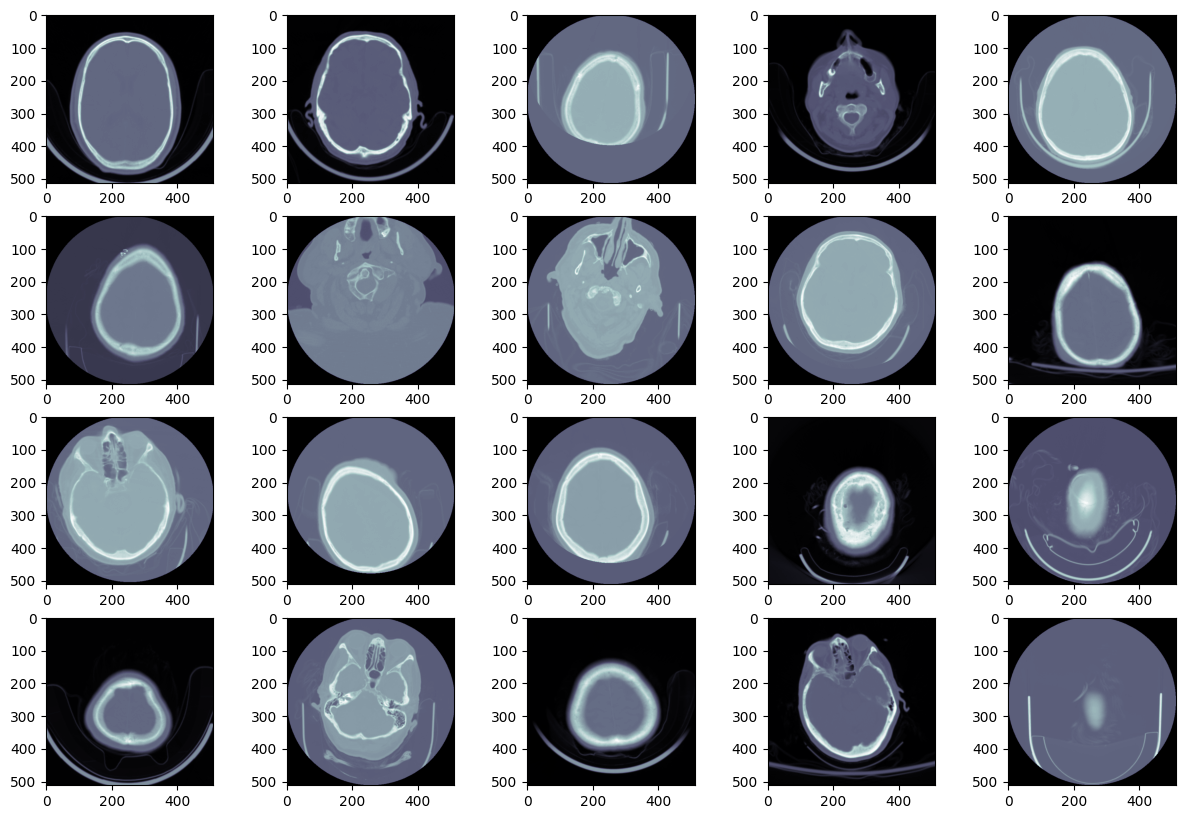

In [7]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4
for i in range(1, columns*rows +1):
    ds = pydicom.dcmread(train_images_dir + train_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    fig.add_subplot

In [8]:
import warnings
warnings.filterwarnings('ignore')
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 176
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 9999.286865239219790656472845812768510994592
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.38'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_f6f661ca8
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_5d950745'
(0020, 000d) Study Instance UID                  UI: ID_73ce617f78
(0020, 000e) Series Instance UID                 UI: ID_3c578c8dbd
(0020, 0010) Study ID                            SH: ''
(0020, 00

In [9]:
im = ds.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
int16
(512, 512)


(-0.5, 511.5, 511.5, -0.5)

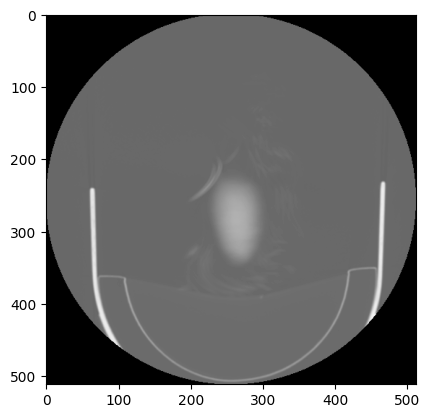

In [10]:
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('on')

Label
0    4260600
1     256242
Name: count, dtype: int64


<Axes: xlabel='Label', ylabel='count'>

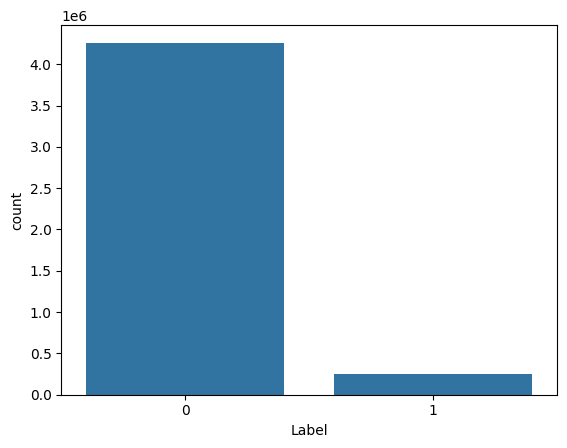

In [11]:
print(train.Label.value_counts())
sns.countplot(x='Label', data=train)

In [12]:
train['Sub_type'] = train['ID'].str.split("_", n = 3, expand = True)[2]
train['PatientID'] = train['ID'].str.split("_", n = 3, expand = True)[1]

In [13]:
train.head()

,ID,Label,Sub_type,PatientID
0,ID_12cadc6af_epidural,0,epidural,12cadc6af
1,ID_12cadc6af_intraparenchymal,0,intraparenchymal,12cadc6af
2,ID_12cadc6af_intraventricular,0,intraventricular,12cadc6af
3,ID_12cadc6af_subarachnoid,0,subarachnoid,12cadc6af
4,ID_12cadc6af_subdural,0,subdural,12cadc6af


Text(0.5, 1.0, 'Total Images by Subtype')

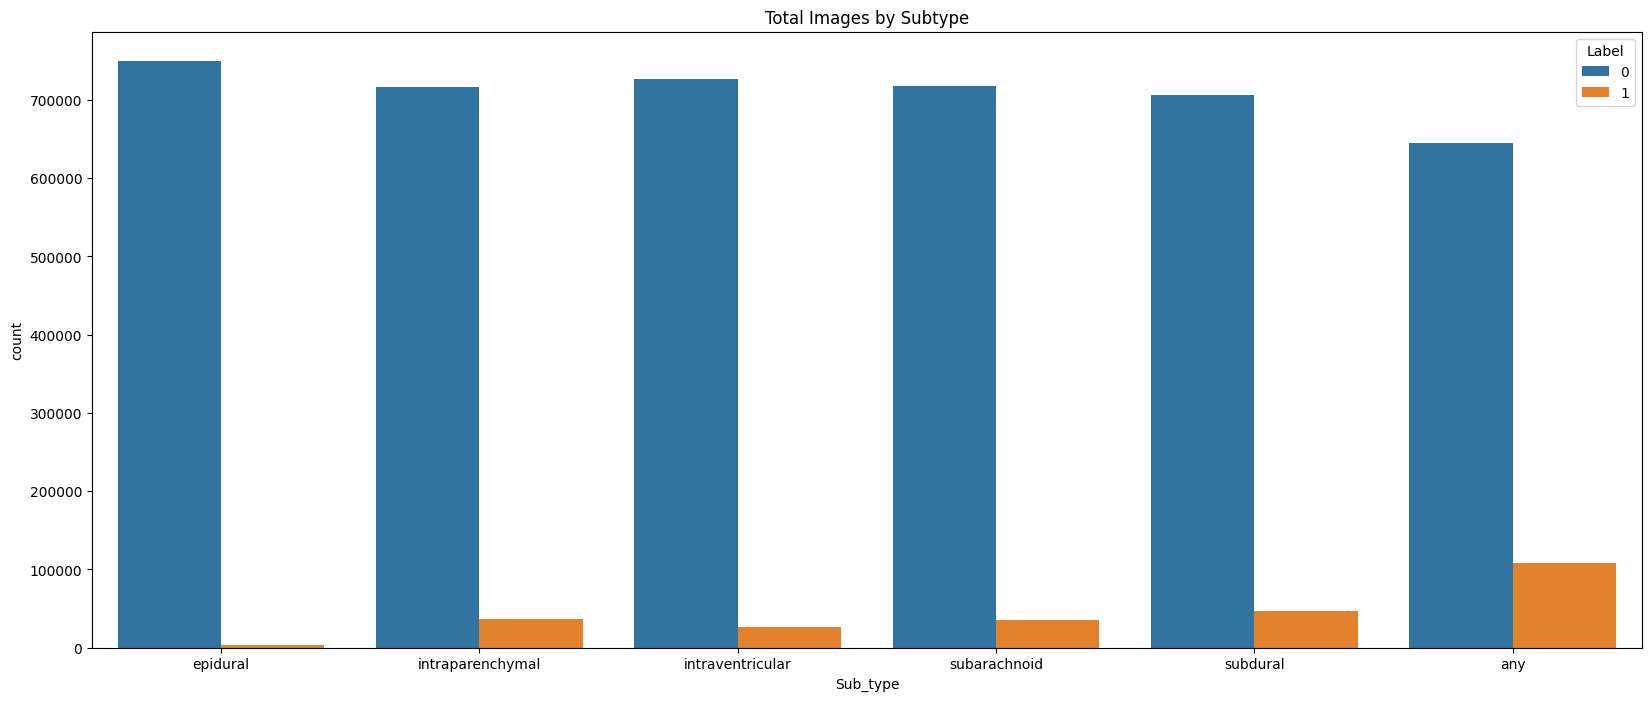

In [14]:
fig=plt.figure(figsize=(20, 8))

sns.countplot(x="Sub_type", hue="Label", data=train)

plt.title("Total Images by Subtype")

<Axes: xlabel='Label', ylabel='count'>

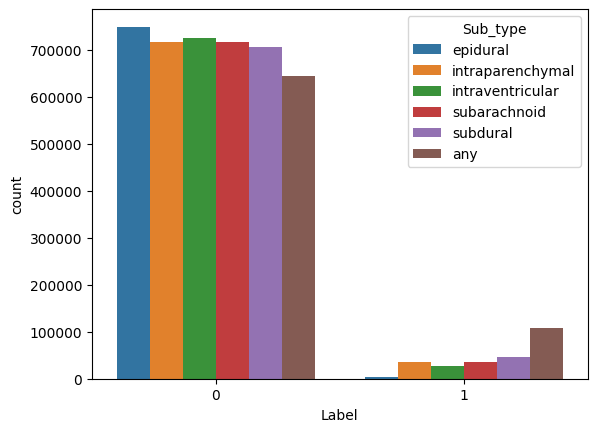

In [15]:
sns.countplot(x="Label", hue="Sub_type", data=train)

In [16]:
subtype_counts = train.groupby("Sub_type").Label.value_counts().unstack()
subtype_counts = subtype_counts.loc[:, 1] / train.groupby("Sub_type").size() * 100
subtype_counts

Sub_type
any                 14.337407
epidural             0.417770
intraparenchymal     4.797777
intraventricular     3.480972
subarachnoid         4.738930
subdural             6.265351
dtype: float64

In [17]:
traindf=train.copy()
traindf[['ID', 'Image', 'Diagnosis']] = traindf['ID'].str.split('_', expand=True)
traindf = traindf[['Image', 'Diagnosis', 'Label']]
traindf.drop_duplicates(inplace=True)
traindf = traindf.pivot(index='Image', columns='Diagnosis', values='Label').reset_index()
traindf['Image'] = 'ID_' + traindf['Image']
traindf.head(10)

Diagnosis,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000012eaf,0,0,0,0,0,0
1,ID_000039fa0,0,0,0,0,0,0
2,ID_00005679d,0,0,0,0,0,0
3,ID_00008ce3c,0,0,0,0,0,0
4,ID_0000950d7,0,0,0,0,0,0
5,ID_0000aee4b,0,0,0,0,0,0
6,ID_0000ca2f6,0,0,0,0,0,0
7,ID_0000f1657,0,0,0,0,0,0
8,ID_000178e76,0,0,0,0,0,0
9,ID_00019828f,0,0,0,0,0,0


In [18]:
for n in range(6):
    many = traindf[traindf[['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']].sum(1) == n].copy()
    print('Number of hemorrhages: {}, amount of such images: {}, fraction: {:.3f}%'.format(n, len(many), 100 * len(many) / len(traindf)))

Number of hemorrhages: 0, amount of such images: 644870, fraction: 85.663%
Number of hemorrhages: 1, amount of such images: 75859, fraction: 10.077%
Number of hemorrhages: 2, amount of such images: 24826, fraction: 3.298%
Number of hemorrhages: 3, amount of such images: 6217, fraction: 0.826%
Number of hemorrhages: 4, amount of such images: 1008, fraction: 0.134%
Number of hemorrhages: 5, amount of such images: 23, fraction: 0.003%


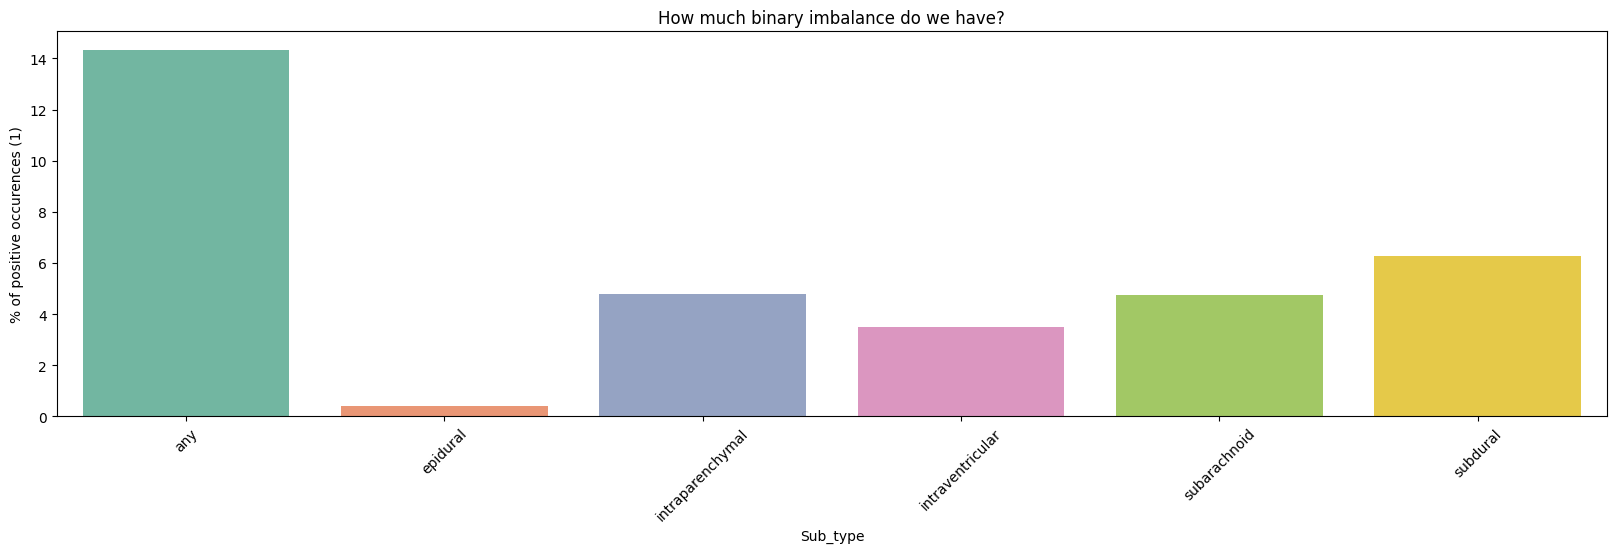

In [19]:
multi_target_count = train.groupby("ID").Label.sum()
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.barplot(x=subtype_counts.index, y=subtype_counts.values, ax=ax, palette="Set2")
plt.xticks(rotation=45); 
ax.set_title("How much binary imbalance do we have?")
ax.set_ylabel("% of positive occurences (1)");
plt.show() 

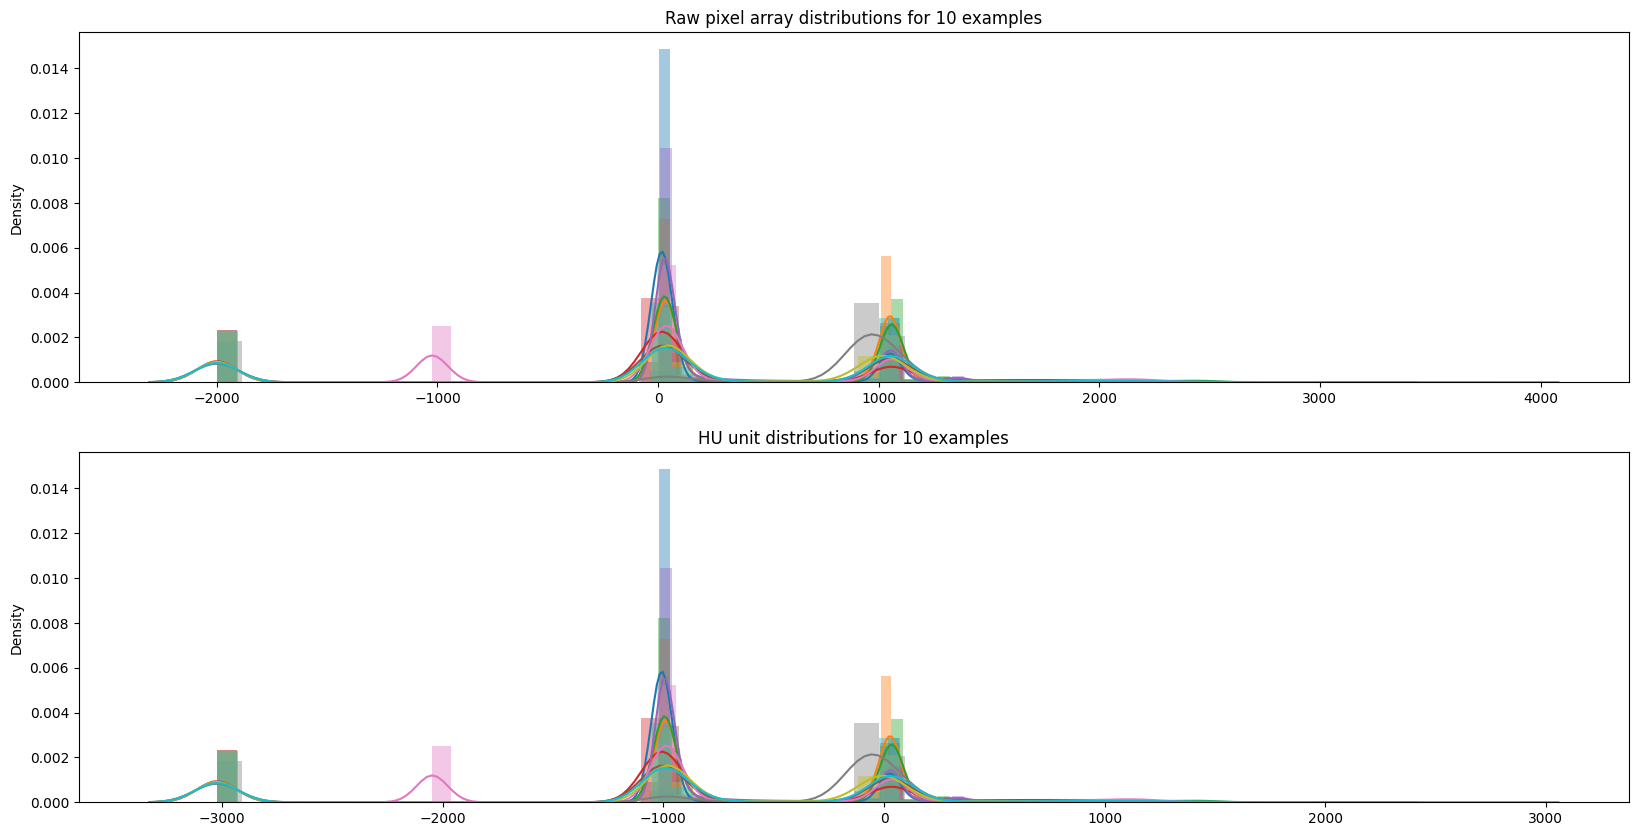

In [20]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
for file in train_images[0:10]:
    dataset = pydicom.dcmread(train_images_dir + file)
    image = dataset.pixel_array.flatten()
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
    sns.distplot(image.flatten(), ax=ax[0]);
    sns.distplot(rescaled_image.flatten(), ax=ax[1])
ax[0].set_title("Raw pixel array distributions for 10 examples")
ax[1].set_title("HU unit distributions for 10 examples");

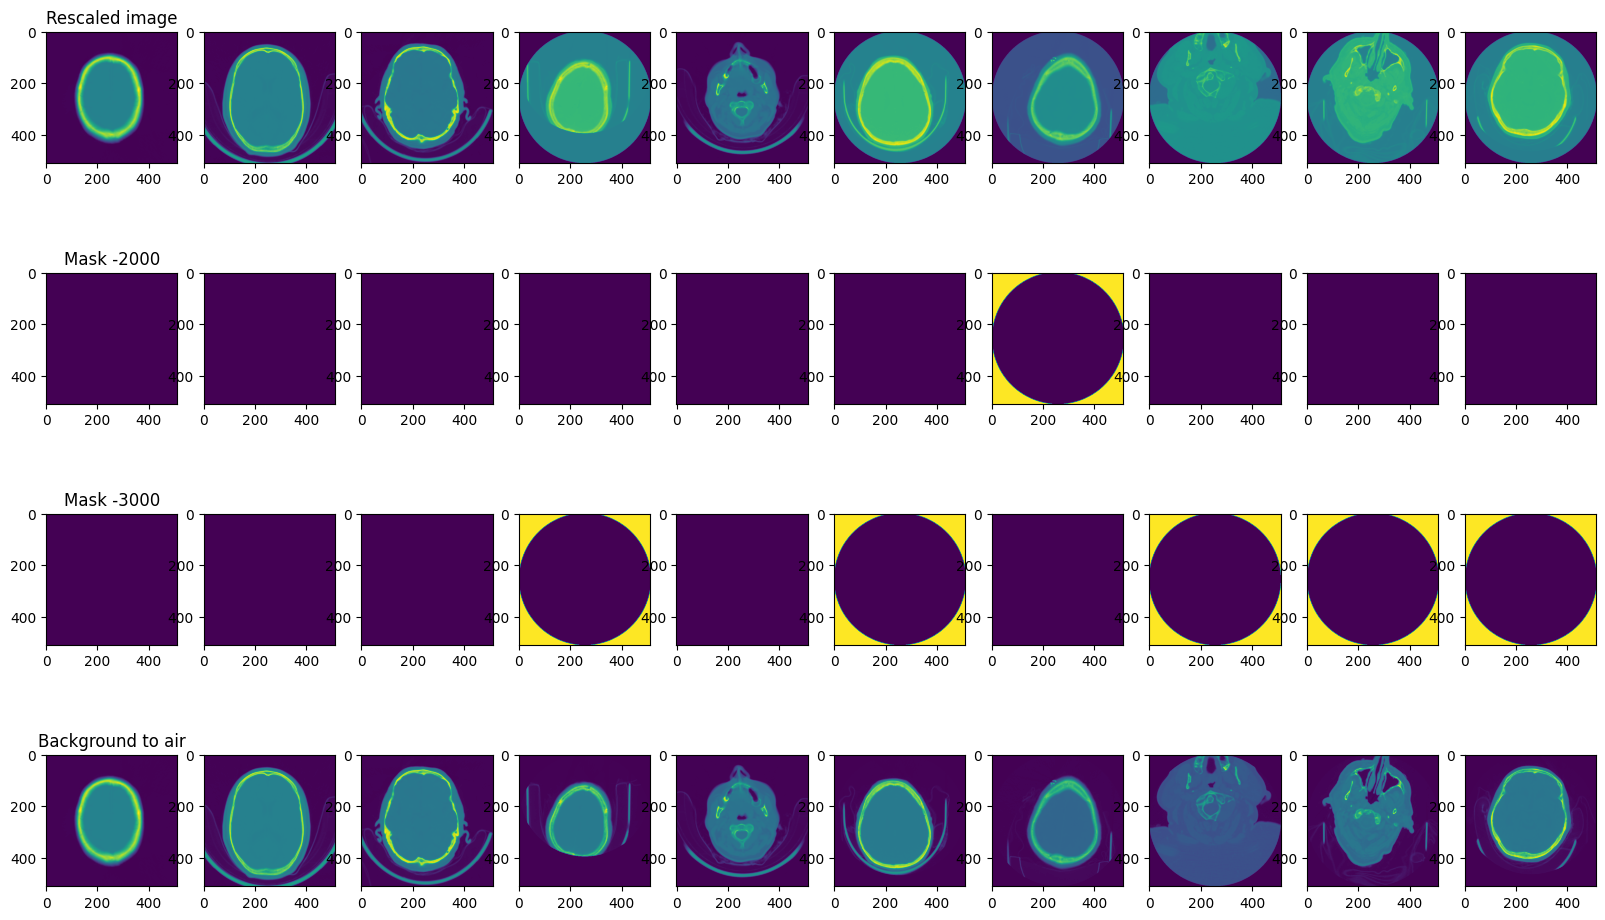

In [21]:
fig, ax = plt.subplots(4,10,figsize=(20,12))

for n in range(10):
    dataset = pydicom.dcmread(train_images_dir + train_images[n])
    image = dataset.pixel_array
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
    mask2000 = np.where((rescaled_image <= -1500) & (rescaled_image > -2500), 1, 0)
    mask3000 = np.where(rescaled_image <= -2500, 1, 0)
    ax[0,n].imshow(rescaled_image)
    rescaled_image[rescaled_image < -1024] = -1024
    ax[1,n].imshow(mask2000)
    ax[2,n].imshow(mask3000)
    ax[3,n].imshow(rescaled_image)
    ax[0,n].grid(False)
    ax[1,n].grid(False)
    ax[2,n].grid(False)
    ax[3,n].grid(False)
ax[0,0].set_title("Rescaled image")
ax[1,0].set_title("Mask -2000")
ax[2,0].set_title("Mask -3000");
ax[3,0].set_title("Background to air");

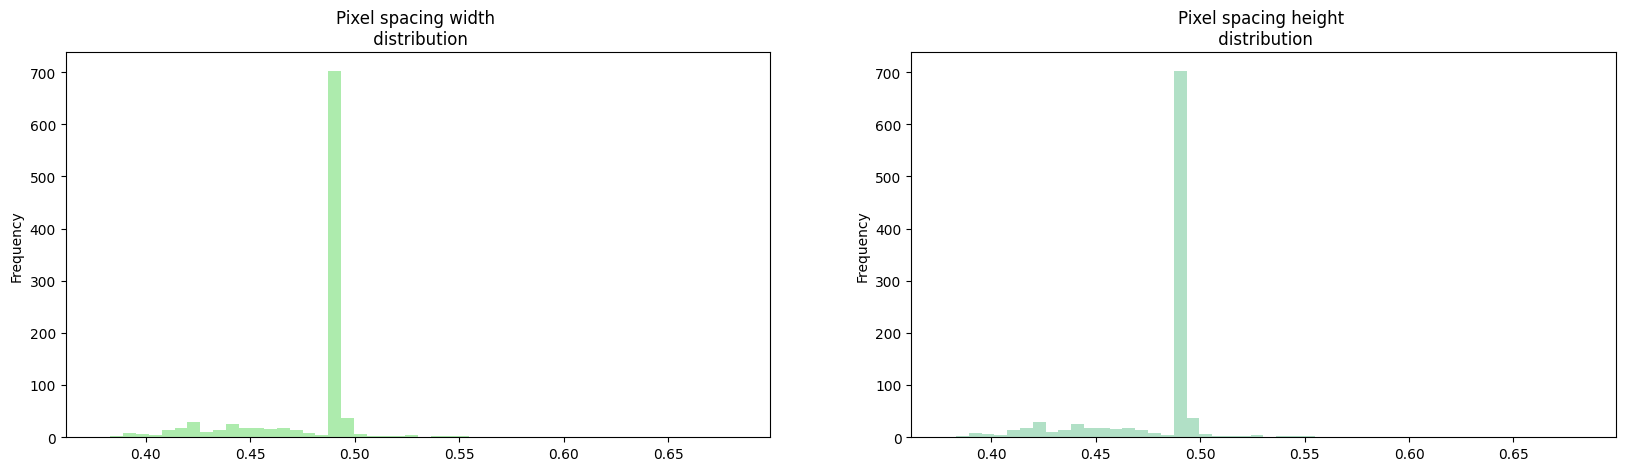

In [22]:
pixelspacing_w = []
pixelspacing_h = []
spacing_filenames = []
for file in train_images[0:1000]:
    dataset = pydicom.dcmread(train_images_dir + file)
    spacing = dataset.PixelSpacing
    pixelspacing_w.append(spacing[0])
    pixelspacing_h.append(spacing[1])
    spacing_filenames.append(file)

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(pixelspacing_w, ax=ax[0], color="Limegreen", kde=False)
ax[0].set_title("Pixel spacing width \n distribution")
ax[0].set_ylabel("Frequency")
sns.distplot(pixelspacing_h, ax=ax[1], color="Mediumseagreen", kde=False)
ax[1].set_title("Pixel spacing height \n distribution");
ax[1].set_ylabel("Frequency");

In [23]:
min_file = spacing_filenames[np.argmin(pixelspacing_w)]
max_file = spacing_filenames[np.argmax(pixelspacing_w)]

In [24]:
def rescale_pixelarray(dataset):
    image = dataset.pixel_array
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
    rescaled_image[rescaled_image < -1024] = -1024
    return rescaled_image

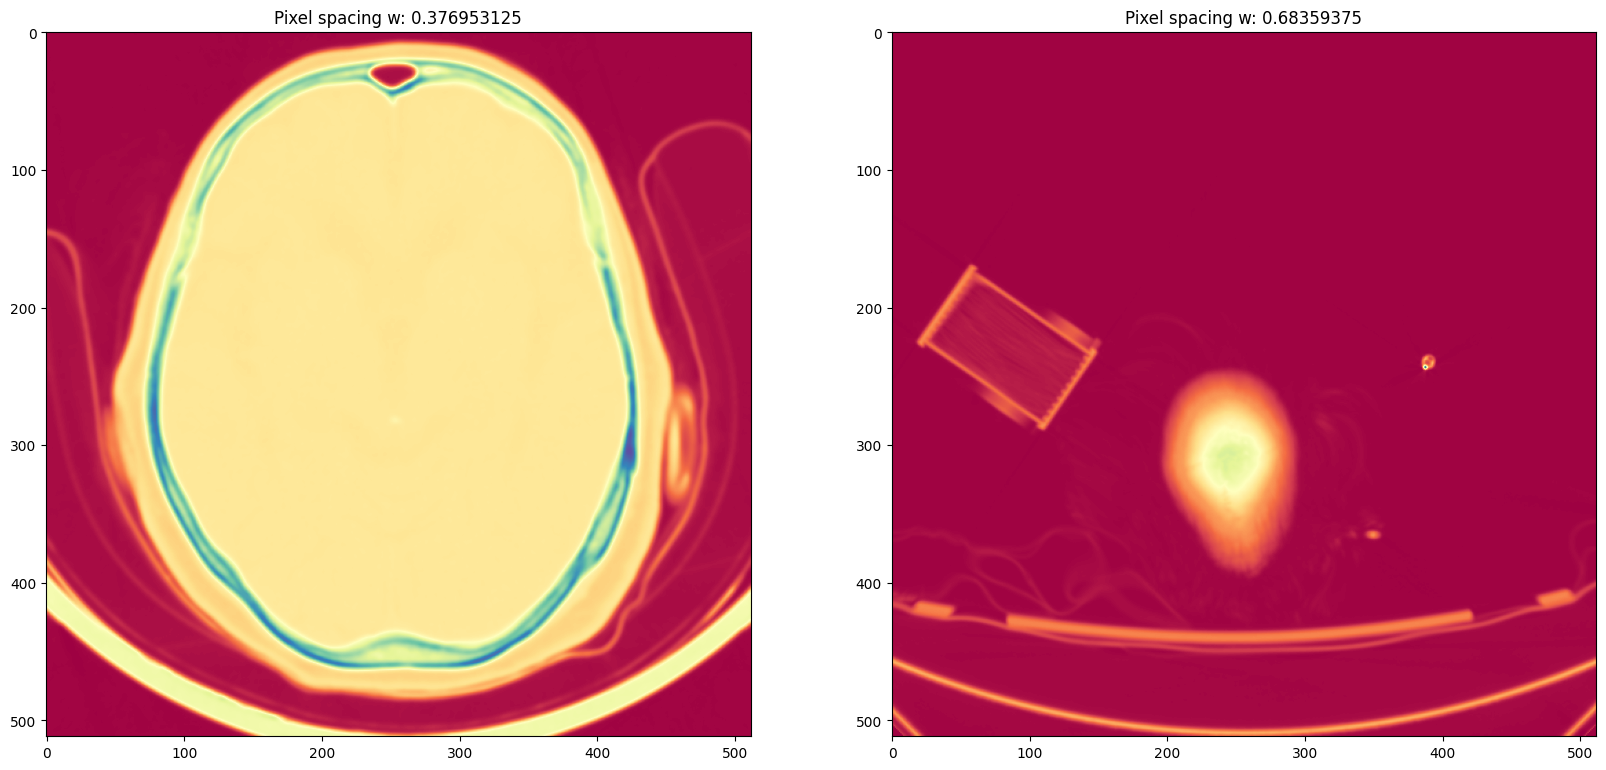

In [25]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

dataset_min = pydicom.dcmread(train_images_dir + min_file)
image_min = rescale_pixelarray(dataset_min)

dataset_max = pydicom.dcmread(train_images_dir + max_file)
image_max = rescale_pixelarray(dataset_max)

ax[0].imshow(image_min, cmap="Spectral")
ax[0].set_title("Pixel spacing w: " + str(np.min(pixelspacing_w)))
ax[1].imshow(image_max, cmap="Spectral");
ax[1].set_title("Pixel spacing w: " + str(np.max(pixelspacing_w)))
ax[0].grid(False)
ax[1].grid(False)

In [26]:
np.min(pixelspacing_w) * 512

193.0

In [27]:
np.max(pixelspacing_w) * 512

350.0

In [28]:
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 
    

In [29]:
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [30]:
def view_images(images, title = '', aug = None):
    width = 5
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(15,5))
    
    for im in range(0, height * width):
        ''''
        image = pydicom.read_file(os.path.join(train_images_dir,'ID_'+images[im]+ '.dcm')).pixel_array
        i = im // width
        j = im % width
        axs[i,j].imshow(image, cmap=plt.cm.bone) 
        axs[i,j].axis('off')'''''
        
        data = pydicom.read_file(os.path.join(train_images_dir,'ID_'+images[im]+ '.dcm'))
        image = data.pixel_array
        window_center , window_width, intercept, slope = get_windowing(data)
        image_windowed = window_image(image, window_center, window_width, intercept, slope)


        i = im // width
        j = im % width
        axs[i,j].imshow(image_windowed, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
        
        
    plt.suptitle(title)
    plt.show()

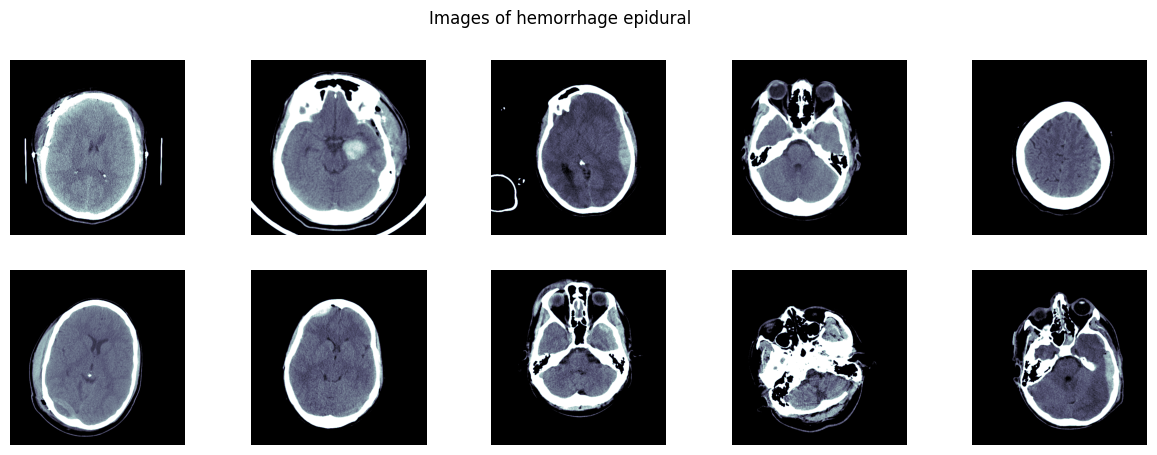

In [31]:
view_images(train[(train['Sub_type'] == 'epidural') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images of hemorrhage epidural')

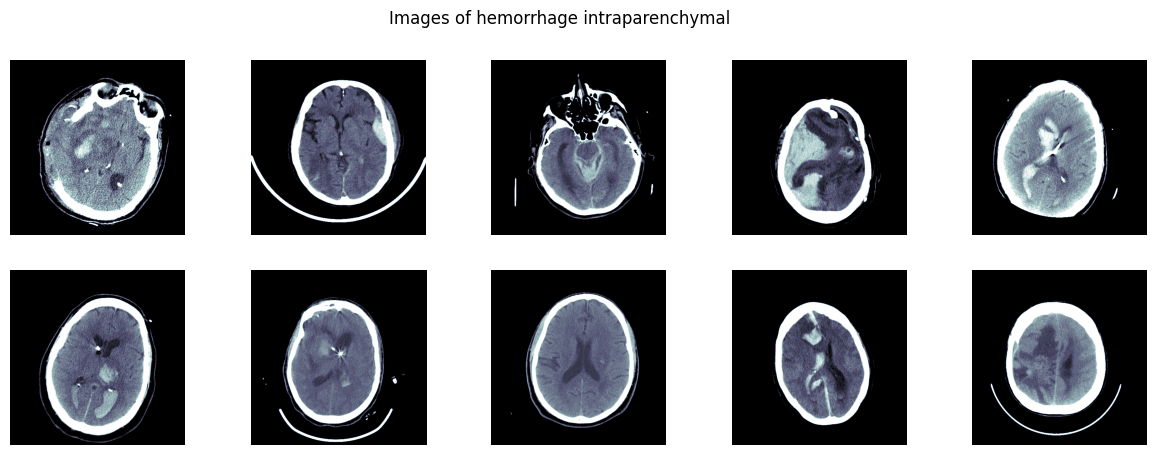

In [32]:
view_images(train[(train['Sub_type'] == 'intraparenchymal') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage intraparenchymal')

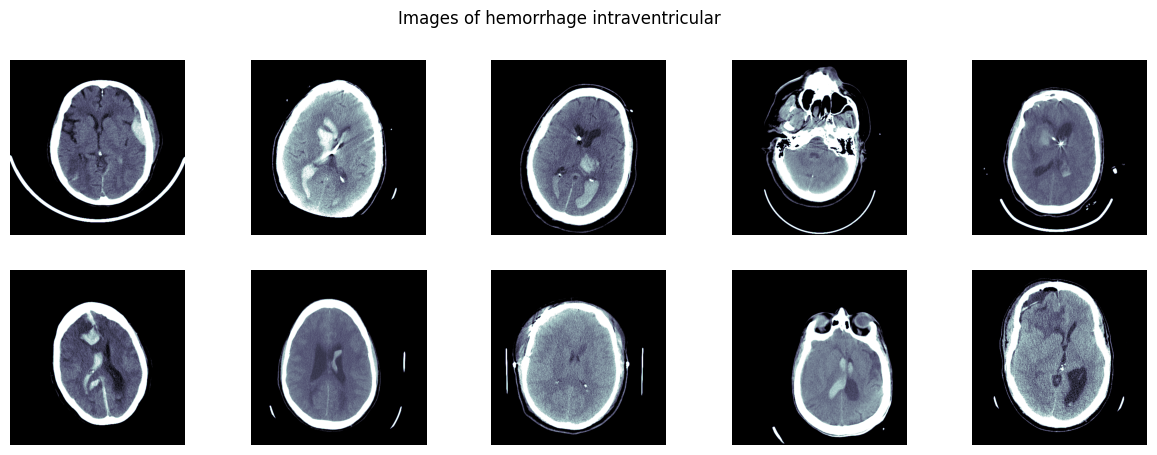

In [33]:
view_images(train[(train['Sub_type'] == 'intraventricular') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage intraventricular')

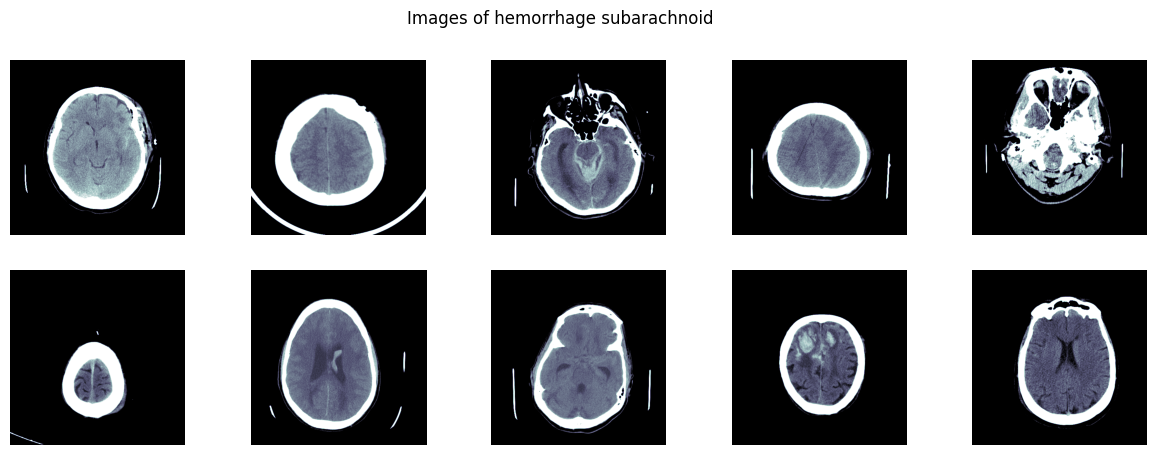

In [34]:
view_images(train[(train['Sub_type'] == 'subarachnoid') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage subarachnoid')

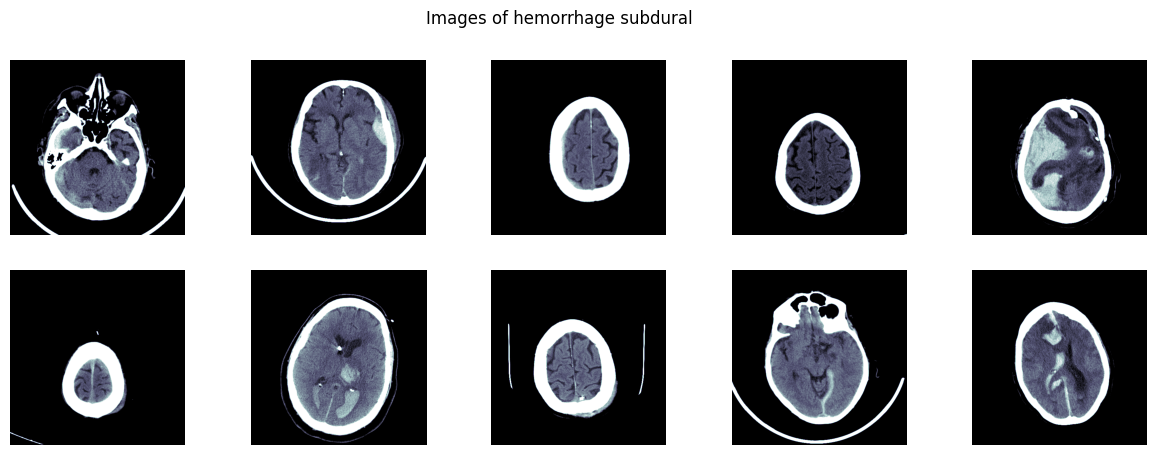

In [35]:
view_images(train[(train['Sub_type'] == 'subdural') & (train['Label'] == 1)][:20].PatientID.values, title = 'Images of hemorrhage subdural')